In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from tensorflow.keras.datasets import mnist

In [25]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [26]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [5]:
#convert pandas to numpy arrays
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [6]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)
# cnn_x_train = np.pad(x_train, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))
# cnn_x_test = np.pad(x_test, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [7]:
mlp_x_train.shape

(27455, 784)

In [11]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 3s 92us/sample - loss: 1.5604 - acc: 0.5092
Epoch 2/10
27455/27455 [==============================] - 3s 93us/sample - loss: 0.5710 - acc: 0.8145
Epoch 3/10
27455/27455 [==============================] - 2s 88us/sample - loss: 0.2801 - acc: 0.9108
Epoch 4/10
27455/27455 [==============================] - 2s 87us/sample - loss: 0.1500 - acc: 0.9536
Epoch 5/10
27455/27455 [==============================] - 2s 88us/sample - loss: 0.0912 - acc: 0.9729
Epoch 6/10
27455/27455 [==============================] - 3s 92us/sample - loss: 0.0920 - acc: 0.9706
Epoch 7/10
27455/27455 [==============================] - 3s 93us/sample - loss: 0.0606 - acc: 0.9812
Epoch 8/10
27455/27455 [==============================] - 2s 89us/sample - loss: 0.0630 - acc: 0.9811
Epoch 9/10
27455/27455 [==============================] - 2s 88us/sample - loss: 0.0511 - acc: 0.9832
Epoch 10/10
27455/27455 [==============================] - 

In [13]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 0s 59us/sample - loss: 0.8733 - acc: 0.8196
Test accuracy for this model is 0.8195761442184448


In [14]:
# Creates the model within this function
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out)
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LeNetMod.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               3084

In [15]:
# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, batch_size=128, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 3s 110us/sample - loss: 2.0506 - acc: 0.3706
Epoch 2/10
27455/27455 [==============================] - 1s 43us/sample - loss: 0.9260 - acc: 0.6998
Epoch 3/10
27455/27455 [==============================] - 1s 43us/sample - loss: 0.4922 - acc: 0.8442
Epoch 4/10
27455/27455 [==============================] - 1s 41us/sample - loss: 0.2598 - acc: 0.9197
Epoch 5/10
27455/27455 [==============================] - 1s 42us/sample - loss: 0.1362 - acc: 0.9652
Epoch 6/10
27455/27455 [==============================] - 1s 47us/sample - loss: 0.0745 - acc: 0.9838
Epoch 7/10
27455/27455 [==============================] - 1s 45us/sample - loss: 0.0390 - acc: 0.9945
Epoch 8/10
27455/27455 [==============================] - 1s 45us/sample - loss: 0.0267 - acc: 0.9961
Epoch 9/10
27455/27455 [==============================] - 1s 43us/sample - loss: 0.0176 - acc: 0.9976
Epoch 10/10
27455/27455 [==============================] -

In [16]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 90us/sample - loss: 0.6429 - acc: 0.8491
Test accuracy for this model is 0.8491355180740356


Text(0.5, 1.0, 'Number 7 classified as 6')

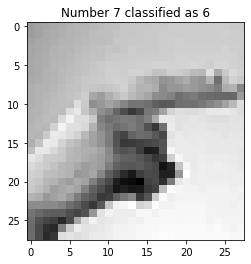

In [27]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
incorrectPreds = np.argwhere(preds != y_test)
randIncInd = np.random.choice(incorrectPreds.reshape(-1))
plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
plt.title("Number {} classified as {}".format(y_test[randIncInd], preds[randIncInd]))

Text(95.72222222222221, 0.5, 'Actual')

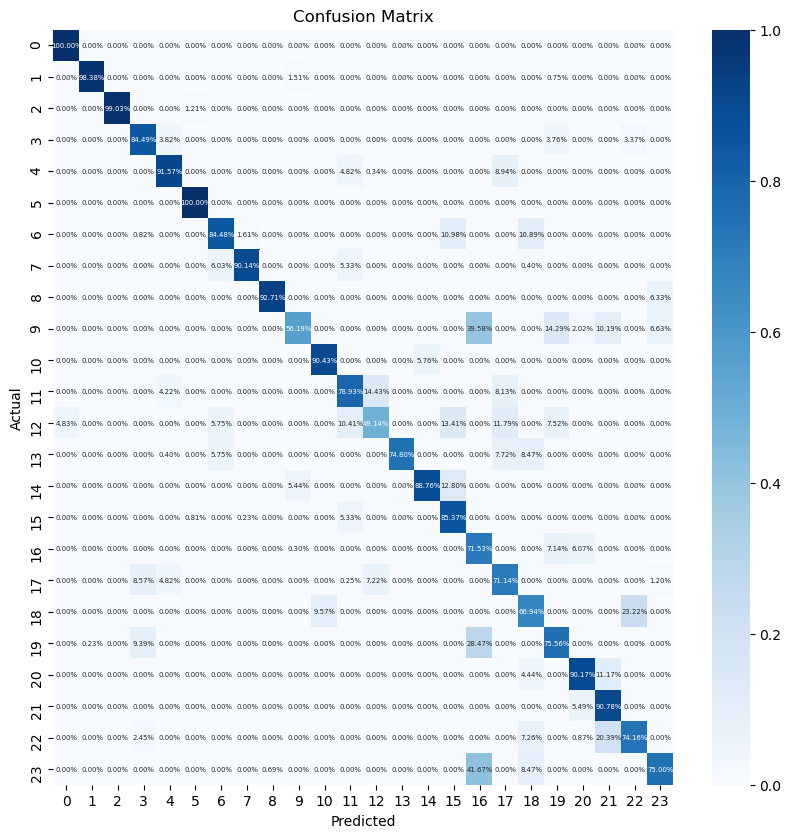

In [15]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 